# Popular Data Science Questions

## Stack Exchange

### What kind of questions are welcome on this site?

From their help's center's section on [asking questions](https://datascience.stackexchange.com/help/dont-ask):

"First, make sure that your question is [on-topic for this site](https://datascience.stackexchange.com/help/on-topic).

You should only ask practical, answerable questions based on actual problems that you face. Chatty, open-ended questions diminish the usefulness of our site and push other questions off the front page.

Your questions should be reasonably scoped. If you can imagine an entire book that answers your question, you’re asking too much.

If your motivation for asking the question is “I would like to participate in a discussion about ____________”, then you should not be asking here. However, if your motivation is “I would like others to explain ____________ to me”, then you are probably OK. (Discussions are of course welcome in our real time web chat.)

**To prevent your question from being flagged and possibly removed, *avoid* asking subjective questions where …**

* every answer is equally valid: “What’s your favorite ____________?”
* your answer is provided along with the question, and you expect more answers: “I use ____________ for ____________, what do you use?”
* there is no actual problem to be solved: “I’m curious if other people feel like I do.”
* you are asking an open-ended, hypothetical question: “What if ____________ happened?”
* your question is just a rant in disguise: “____________ sucks, am I right?”
(The above section was adapted from MetaFilter’s FAQ.)

**Some subjective questions are allowed, but “subjective” does not mean “anything goes”. All subjective questions are expected to be *constructive.*** What does that mean? Constructive subjective questions:

* inspire answers that explain “why” and “how”
* tend to have long, not short, answers
* have a constructive, fair, and impartial tone
* invite sharing experiences over opinions
* insist that opinion be backed up with facts and references
* are more than just mindless social fun

For more detail, read about our [guidelines for great subjective questions](https://blog.stackoverflow.com/2010/09/good-subjective-bad-subjective/) and blog post about how [real questions have answers](https://blog.stackoverflow.com/2011/01/real-questions-have-answers/).

If your question is about the site itself, please don't ask it here. Visit our meta-discussion site, where you can talk about things like what questions are appropriate, what tags should be used, suggest a feature, point out a bug, or generally discuss how this site works."

### What, other than questions, does the site's home subdivide into?

![Data Science Stack Exchange Home](https://i.imgur.com/1OUUMRk.png)

We can see from this image that we have four sections:

* Questions - these are all the questions asked
* Tags - a list of tags (keywords or labels that categorize questoins)
* Users - a list of users
* Unanswered - a list of unanswered questions

Tags allows us to quantify how many questions are aksed about each subject, which may be helpful for us in our analysis.

### What information is available in each post?

In [any question](https://datascience.stackexchange.com/questions/64197/where-to-start-in-natural-language-processing-for-a-language), we can see the following information:

- The post's score
- The post's title
- The post's author
- The post's body
- When the question was asked
- When the question was answered (if applicable)
- How many users "upvoted" the question
- Related Questions
- Hot Network Questions
- How many times the question has been viewed
- When the question was last modified

## Stack Exchange Data Explorer

In investigating a few of the tables, some stand out as a bit more promising:

- Posts
- PostTags
- Tags
- TagSynonyms

Writing a few queries, the `Posts` table seems more promising in finding hte popular content. At first, `Tags` seemed very promising, but it does not allow us to see if the interest in these tags is recent or not, despite telling us how many times each tag was used.

![Tags Query](https://i.imgur.com/lQ0g2gf.png)

## Getting the Data

To extract the relevant columns for all the questions in 2019 we will run the following query.

```
SELECT Id, PostTypeId, CreationDate, Score, ViewCount, Tags, AnswerCount, FavoriteCount
  FROM posts
  WHERE PostTypeId = 1 AND year(CreationDate) = 2019
```

The first few rows are shown in the image below

![Getting the Data Image](https://i.imgur.com/erZsxSN.png)

## Exploring the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


#### How many missing values are there in each column?
Only FavoriteCount has missing values - 7,432 to be exact.

#### Can we fix the missing values somehow?
A missing FavoriteCount likely indicates that a user did not favorite this question, so we can replace with a 0.

#### Are the types of each column adequate?
These seem adequate, although we can probably change FavoriteCount to an `int` from `float`.

#### What can we do about the `Tags` column?
We can probably separate each `Tags` column into separate columns for each tag listed - or, we can just keep them as a list.

## Cleaning the Data

In [2]:
df.fillna(value={"FavoriteCount": 0}, inplace=True)

In [3]:
df['FavoriteCount'] = df['FavoriteCount'].astype(int)
df.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [4]:
df["Tags"] = df["Tags"].str.replace("^<|>$", "").str.split("><")
df.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
5100,51330,2019-05-03 16:54:01,1,29,"[naive-bayes-classifier, bayesian-networks]",1,0
67,55923,2019-07-18 14:19:53,-1,33,"[machine-learning, linear-regression, linear-a...",1,0
7620,64885,2019-12-15 17:24:41,0,36,"[scikit-learn, feature-selection, decision-trees]",1,0


## Most Used and Most Viewed

We will start with looking at how many times each tag was used.

In [5]:
tag_count = dict()

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [6]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(10)

,Count
ridge-regression,7
marketing,6
xgboost,165
library,2
neural-style-transfer,8
convnet,111
nosql,3
numpy,117
gaussian,20
tableau,9


In [7]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


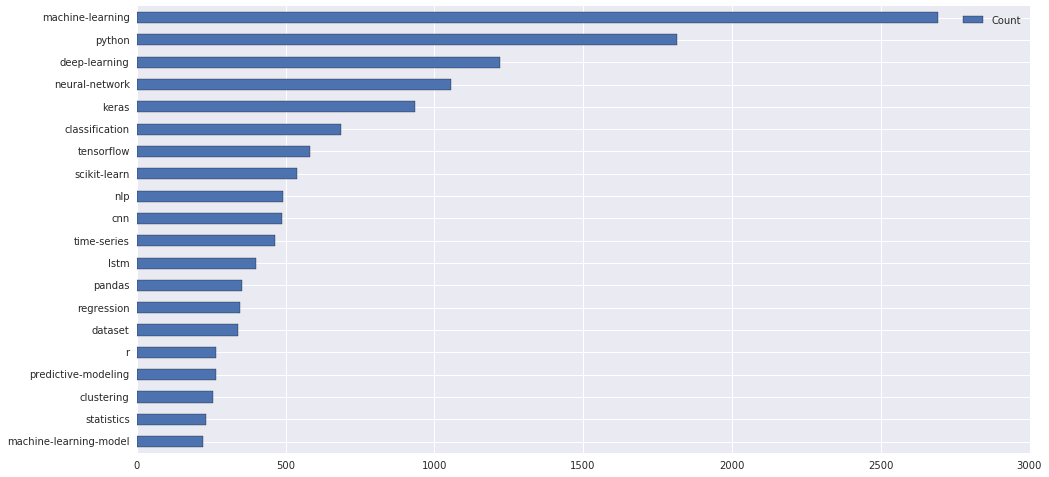

In [8]:
most_used.plot(kind="barh", figsize=(16,8))

Now, we will repeat the same process for views, using panda's `pandas.DataFrame.iterrows()`

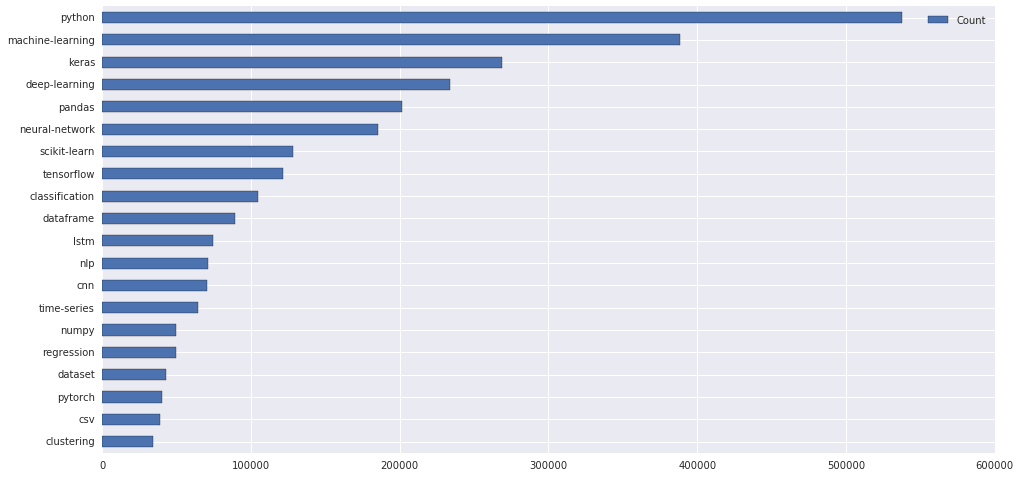

In [9]:
view_count = dict()

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in view_count:
            view_count[tag] += row['ViewCount']
        else:
            view_count[tag] = row['ViewCount']
            
view_count = pd.DataFrame.from_dict(view_count, orient="index")
view_count.rename(columns={0: "Count"}, inplace=True)

most_viewed = view_count.sort_values(by="Count").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

## Enter Domain Knowledge

The most used tags are also the most viewed. From the top 10 tags of each, here's a list of the tags in common: `python`, `machine-learning`, `deep-learning`, `neural-network`, `keras`, `tensorflow`, `classification`, `scikit-learn`.

[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).

We can see that most of the top tags in most used and most viewed have the central theme of deep learning.

## Just a Fad?

One thing that comes to mind is "Is deep learning just a fad?" Ideally, the content we decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down?

In this we will track the interest in deep learning across time. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [10]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [11]:
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

This list was obtained by looking at all the tags in `most_used` and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns `1` to deep learning questions and `0` otherwise; and we use it.

In [12]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [13]:
all_questions['DeepLearning'] = all_questions['Tags'].apply(class_deep_learning)
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
14688,62777,2019-11-06 16:26:56,[r],0
8526,6847,2015-08-20 14:56:40,"[machine-learning, data-mining, graphs]",0
9797,41816,2018-11-28 21:02:04,"[machine-learning, classification, decision-tr...",0
13720,30834,2018-04-25 16:33:50,"[machine-learning, python, neural-network, dee...",1
18558,64460,2019-12-09 09:24:28,"[categorical-data, categorical-encoding]",0


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [14]:
all_questions = all_questions[all_questions["CreationDate"].dt.year < 2020]

In [15]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) //3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_questions["Quarter"] = all_questions["CreationDate"].apply(fetch_quarter)

In [16]:
all_questions.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


For the final stretch of this screen, we'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [17]:
quarterly = all_questions.groupby('Quarter').agg({'DeepLearning': ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions']/quarterly['TotalQuestions']

#to help with visualizations later
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
8,16Q2,109,518,0.210425
7,16Q1,110,516,0.213178
13,17Q3,247,714,0.345938
0,14Q2,9,157,0.057325
18,18Q4,531,1294,0.410355


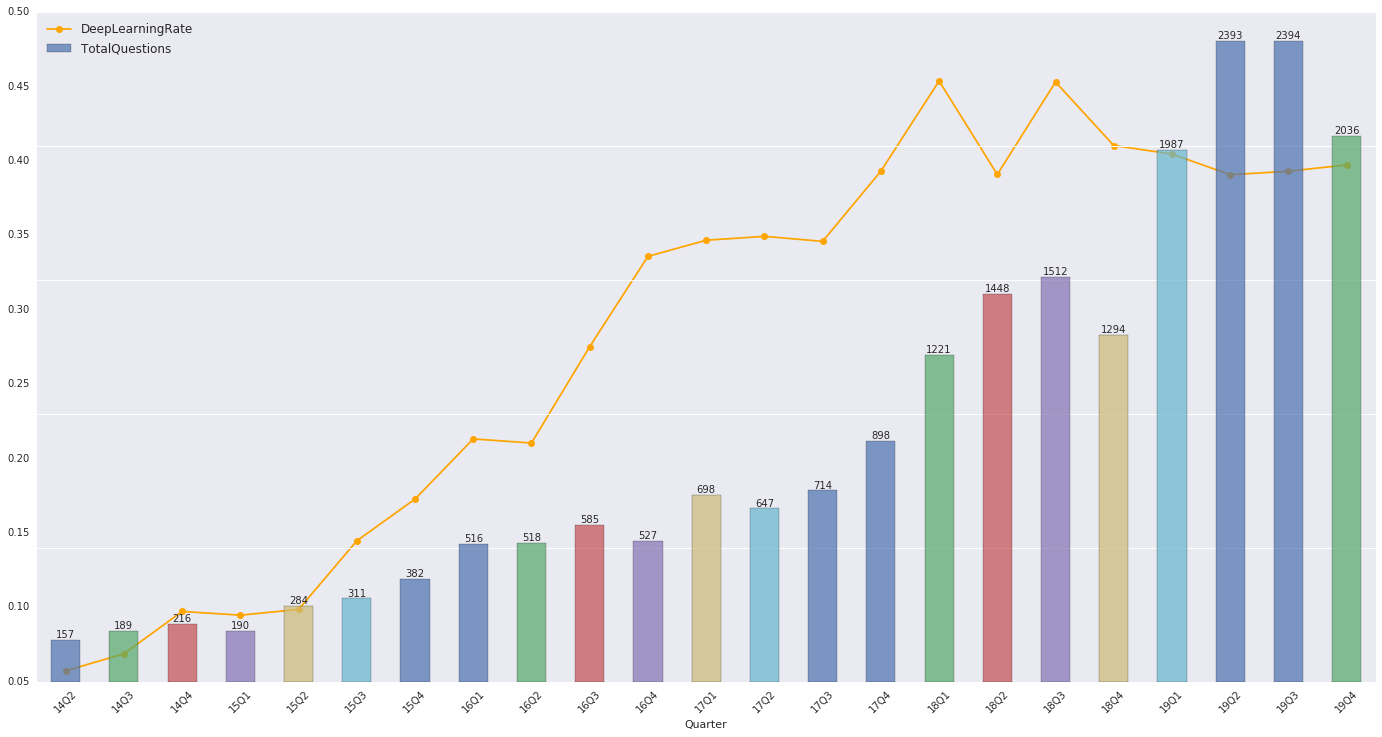

In [18]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate", kind="line", linestyle="-", marker="o", color="orange", figsize=(24,12))

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions", kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
          labels=labels1 + labels2,
          loc="upper left", prop={"size": 12})

for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.